In [210]:
import numpy as np
import pandas as pd
from fastai.imports import *
np.set_printoptions(linewidth=130)

## Data preprocessing

In [211]:
df = pd.read_csv('parkinsons/pd_speech_features.csv')
df.columns=df.iloc[0]
df = df.drop(index=0)
modes = df.mode().iloc[0]
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [213]:
def proc_data(df):
    
    mode_list = modes.sort_values(ascending=False).head(190).keys().tolist()
    
    df['PD'] = df['class']
    
    exclude = ['gender', 'PD']
    flt_convert = [col for col in df.columns if col not in exclude]
    df[flt_convert] = df[flt_convert].astype(np.float32)
    
    df['gender'] = pd.Categorical(df.gender)
    df['PD'] = pd.Categorical(df.PD)
    
    for column in mode_list:
        try:
            df[column] = np.log(df[column])
        except Exception as e:
            print(f"Error occurred in column: {column}")
            print(f"Error message: {str(e)}")
    
    df = df.drop(['id', 'class'], axis=1)

proc_data(df)

D:\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [214]:
df = df.drop(['id', 'class'], axis=1)
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,PD
1,1,0.85247,0.71826,0.57227,5.480639,5.476463,0.008064,-9.351904,0.00218,0.000018,...,1.562000,0.972482,1.352893,1.437581,1.633564,1.495709,0.963251,1.098746,2.941303,1
2,1,0.76686,0.69481,0.53966,5.455321,5.451038,0.008258,-9.523683,0.00195,0.000016,...,1.558900,1.283902,3.157660,2.652974,2.400265,2.252155,1.875564,1.847368,3.810610,1
3,1,0.85083,0.67604,0.58982,5.446737,5.442418,0.008340,-9.714521,0.00176,0.000015,...,1.564300,0.846212,2.250860,2.374515,2.399503,1.569990,1.071549,1.147244,1.561633,1
4,0,0.41121,0.79672,0.59257,5.181784,5.176150,0.010858,-8.607451,0.00419,0.000046,...,3.780500,1.271557,1.659332,2.641932,1.440664,1.544515,1.578154,1.834979,1.401257,1
5,0,0.32790,0.79782,0.53028,5.463832,5.459586,0.008162,-5.926103,0.00535,0.000044,...,6.172700,1.765005,1.805087,1.751302,2.051775,2.458657,2.105390,1.620556,1.810974,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0,0.80903,0.56355,0.28385,6.033086,6.030685,0.004627,-9.860428,0.00064,0.000003,...,3.070600,1.104926,1.138218,0.913126,1.276591,1.264127,1.218024,1.163245,1.926742,0
753,0,0.16084,0.56499,0.59194,6.028278,6.023448,0.004550,-8.421910,0.00143,0.000006,...,1.970400,0.556812,0.603058,0.915330,1.667348,1.449645,1.841216,2.389295,3.346987,0
754,0,0.88389,0.72335,0.46815,5.942800,5.940171,0.005069,-9.184147,0.00076,0.000004,...,51.560699,3.794682,3.264178,1.841755,1.050857,0.930627,1.263477,1.210303,1.617882,0
755,0,0.83782,0.74890,0.49823,5.828946,5.826000,0.005679,-9.806361,0.00092,0.000005,...,19.160700,2.551880,2.190916,0.790455,0.667624,0.676205,0.985854,1.041407,1.311867,0


In [215]:
df.isna().sum().sort_values(ascending=False).head(50)

0
det_entropy_log_3_coef         550
det_entropy_log_7_coef         422
tqwt_meanValue_dec_26          397
tqwt_medianValue_dec_22        390
tqwt_meanValue_dec_23          388
tqwt_medianValue_dec_14        380
tqwt_meanValue_dec_20          379
tqwt_meanValue_dec_9           374
tqwt_medianValue_dec_32        370
tqwt_meanValue_dec_6           367
tqwt_meanValue_dec_25          363
tqwt_meanValue_dec_17          358
tqwt_meanValue_dec_3           355
det_entropy_log_6_coef         353
tqwt_medianValue_dec_11        350
det_entropy_log_9_coef         313
det_entropy_log_8_coef         269
det_entropy_log_5_coef         257
det_entropy_log_4_coef         202
det_entropy_log_10_coef        135
tqwt_entropy_shannon_dec_25     58
tqwt_entropy_shannon_dec_26     56
tqwt_entropy_shannon_dec_27     36
tqwt_entropy_shannon_dec_24     29
tqwt_entropy_shannon_dec_23      8
tqwt_entropy_shannon_dec_18      5
tqwt_entropy_shannon_dec_19      4
tqwt_entropy_shannon_dec_20      2
tqwt_entropy_shann

In [218]:
df = df.dropna(axis=1)
df.isna().sum().sort_values(ascending=False).head()

0
gender                  0
tqwt_TKEO_std_dec_30    0
tqwt_TKEO_std_dec_32    0
tqwt_TKEO_std_dec_33    0
tqwt_TKEO_std_dec_34    0
dtype: int64

In [219]:
cats=['gender', 'PD']
conts=[col for col in df.columns if col not in cats]
cats=['gender']
dep='PD'

print(cats, dep, conts)

['gender'] PD ['PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed', 'GNE_mean', 'GNE_std', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_TKEO', 'GNE_NSR_SEO', 'VFER_mean', 'VFER_std', 'VFER_entropy', 'VFER_SNR_TKEO', 'VFER_SNR_SEO', 'VFER_NSR_TKEO', 'VFER_NSR_SEO', 'IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO', 'IMF_NSR_TKEO', 'IMF_NSR_entropy', 'mean_Log_energy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4th_coef', 'mean_MFCC_5th_coef', 'mean_MFCC_6th_coef', 'mean_MFCC_7th_coef

## Binary splits

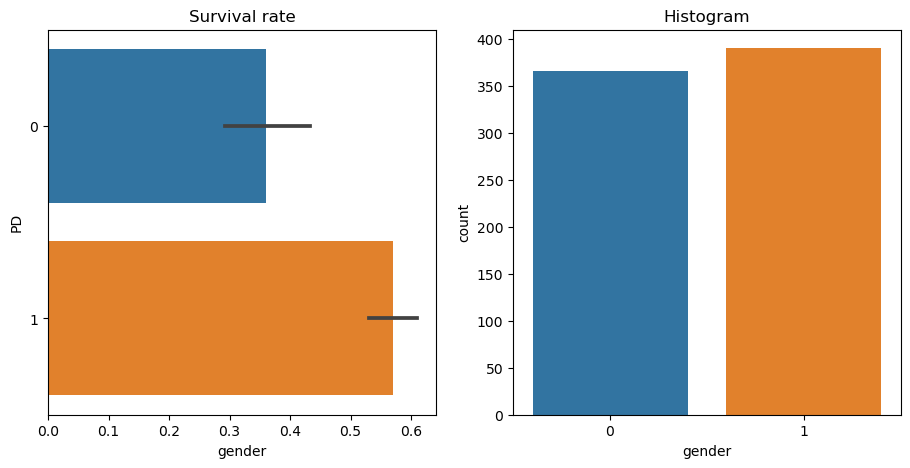

In [220]:
import seaborn as sns

df['gender'] = df['gender'].astype(int)
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y=dep, x="gender", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=df, x="gender", ax=axs[1]).set(title="Histogram");

In [221]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
df['gender'] = pd.Categorical(df.gender)
trn_df,val_df = train_test_split(df, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [222]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [223]:
preds = val_xs.gender==0

In [224]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.5767195767195767

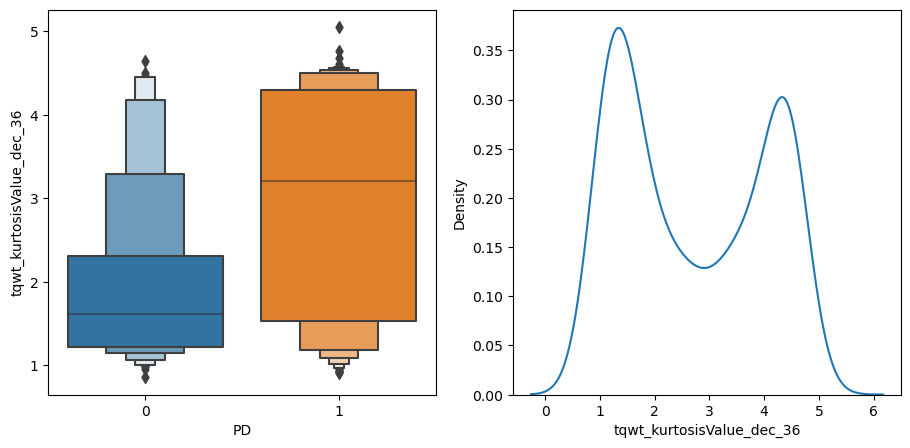

In [225]:
df_fare = trn_df[trn_df.tqwt_kurtosisValue_dec_36>-10000]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df_fare, x=dep, y="tqwt_kurtosisValue_dec_36", ax=axs[0])
sns.kdeplot(data=df_fare, x="tqwt_kurtosisValue_dec_36", ax=axs[1]);

In [226]:
preds = val_xs.tqwt_kurtosisValue_dec_36>1.8

In [227]:
mean_absolute_error(val_y, preds)

0.36507936507936506

In [228]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

In [229]:
    
def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

In [230]:
trn_y = trn_y.astype('category').cat.codes
trn_y

590    0
362    1
690    1
292    1
25     1
      ..
72     1
107    1
271    1
436    1
103    0
Length: 567, dtype: int8

In [231]:
score(trn_xs["tqwt_kurtosisValue_dec_36"], trn_y, 1.7)

0.4164788962051534

In [232]:
def iscore(nm, split):
    col = trn_xs[nm]
    return score(col, trn_y, split)

from ipywidgets import interact
interact(nm=conts, split=15.5)(iscore);

interactive(children=(Dropdown(description='nm', options=('PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses…

In [233]:
interact(nm=cats, split=2)(iscore);

interactive(children=(Dropdown(description='nm', options=('gender',), value='gender'), IntSlider(value=2, desc…

In [234]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

3.227562

In [235]:
def min_col(df, nm):
    col,y = df[nm],df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

min_col(trn_df, "tqwt_kurtosisValue_dec_36")

(3.227562, 0.39533724633072664)

In [236]:
cols = cats+conts

## Creating a decision tree

In [237]:
cols.remove("gender")
ismale = trn_df.gender==1
males,females = trn_df[ismale],trn_df[~ismale]

In [239]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [241]:
trn_xs.isna().sum().sort_values(ascending=False).head()

0
gender                  0
tqwt_TKEO_std_dec_29    0
tqwt_TKEO_std_dec_31    0
tqwt_TKEO_std_dec_32    0
tqwt_TKEO_std_dec_33    0
dtype: int64

In [242]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

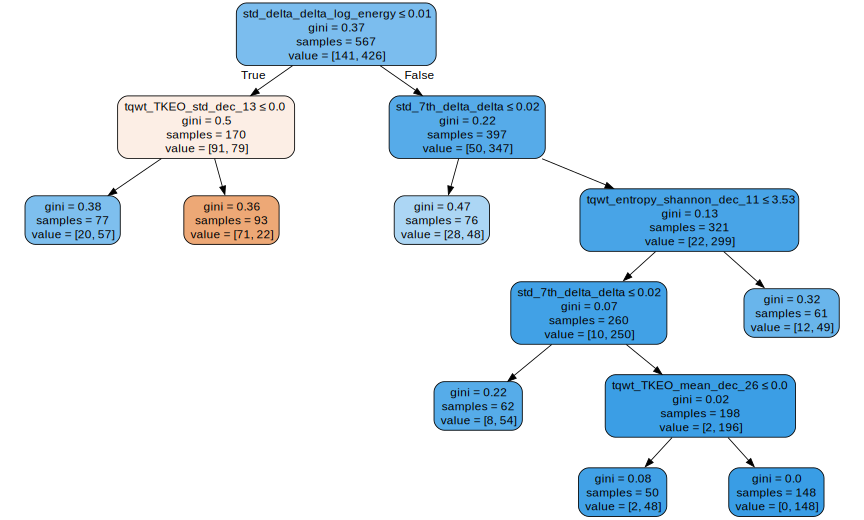

In [244]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [245]:
mean_absolute_error(val_y, m.predict(val_xs))

0.20634920634920634

## The random forest

This is nearly identical to what `sklearn`'s `RandomForestClassifier` does. The main extra piece in a "real" random forest is that as well as choosing a random sample of data for each tree, it also picks a random subset of columns for each split. Here's how we repeat the above process with a random forest:

In [249]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
mean_absolute_error(val_y, rf.predict(val_xs))

0.1693121693121693

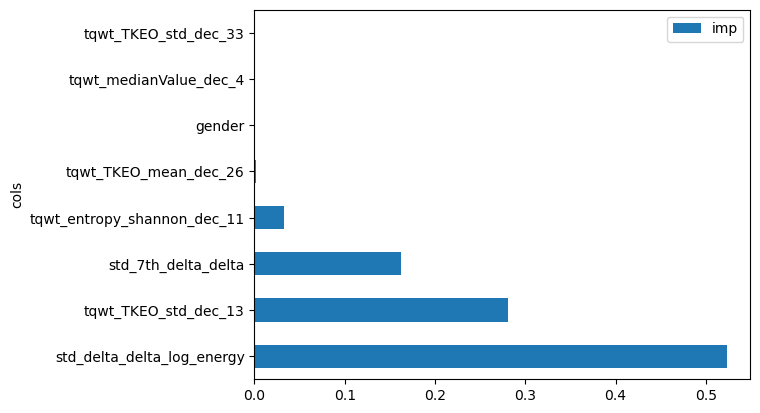

In [253]:
import matplotlib.pyplot as plt

datax = {'cols': trn_xs.columns, 'imp': m.feature_importances_}
dfx = pd.DataFrame(datax)

df_sorted = dfx.sort_values(by='imp', ascending=False)
df_top_n = df_sorted.head(8)

df_top_n.plot(x='cols', y='imp', kind='barh')

plt.show()
